## A notebook to create a bar graph of CTs inside AS

## Install and import libraries

In [100]:

%pip install pandas seaborn numpy requests matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import requests
from  io import StringIO
import textwrap
from pprint import pprint
import matplotlib.ticker as ticker

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Global settings

In [101]:
hra_pop_version = 'v1.0'
branch = 'main'

output_folder = 'output/ctBar3dAs'

## Load data

In [102]:
# could also use https://apps.humanatlas.io/api/grlc/hra-pop.html#get-/cell-types-in-atlas
url = f"https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-in-anatomical-structurescts-per-as.csv"

headers = {
  'Accept' :'text/csv'
  }

data = requests.get(url=url, headers=headers).text

df = pd.read_csv(StringIO(data))
df

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
...               ...                                            ...   
8873             lung            http://purl.org/sig/ont/fma/fma7508   
8874             lung            http://purl.org/sig/ont/fma/fma7508   
8875             lung            http://purl.org/sig/ont/fma/fma7508   
8876             lung            http://purl.org/sig/ont/fma/fma7508   
8877             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      rectum  Female     celltypist   
1                                      rectum  Female     celltypist   
2                                      rectum  Female     celltypist   
3                                      rectum  Female     celltypist   
4                                      rectum  Female     celltypist   
...                                       ...     ...            ...   
8873  Left posterior basal segmental bronchus    Male  sc_proteomics   
8874  Left posterior basal segmental bronchus    Male  sc_proteomics   
8875  Left posterior basal segmental bronchus    Male  sc_proteomics   
8876  Left posterior basal segmental bronchus    Male  sc_proteomics   
8877  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
1     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell   
2     sc_transcriptomics   https://purl.org/ccf/ASCTB-TEMP_best4-epithelial   
3     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t   
4     sc_transcriptomics                 https://purl.org/ccf/ASCTB-TEMP_ta   
...                  ...                                                ...   
8873       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000097   
8874       sc_proteomics          http://purl.obolibrary.org/obo/CL_4033039   
8875       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
8876       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
8877       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000236   

                                         cell_label  cell_count  \
0                                        Colonocyte       1.205   
1                                   IgA plasma cell       1.182   
2                                 BEST4+ epithelial       0.699   
3                                   Activated CD4 T       0.690   
4                                                TA       0.540   
...                                             ...         ...   
8873                                      Mast Cell   15322.464   
8874                                    CD8+ T Cell    3691.176   
8875  Lymphatic Endothelial (and some immune cells)    1753.956   
8876                          Basal Epithelial Cell     970.104   
8877                                         B Cell     462.144   

      cell_percentage  dataset_count  
0            0.147653              3  
1            0.144835              3  
2            0.085651              3  
3            0.084548              3  
4            0.066168              3  
...               ...            ...  
8873         0.024702              1  
8874         0.005951              1  
8875         0.002828              1  
8876         0.001564              1  
8877         0.000745              1  

[8878 rows x 11 columns]

## Preprocess using `cell-types-level-mapping.csv`

In [103]:
# walk up CTs
csv_response = requests.get(
    f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-level-mapping.csv', headers={'accept': 'text/csv'}).text

look_up = pd.read_csv(StringIO(csv_response))

look_up

cell_label  \
0                                 cell   
1              hematopoietic stem cell   
2                           fibroblast   
3                      epithelial cell   
4        blood vessel endothelial cell   
..                                 ...   
196      lung migratory dendritic cell   
197  respiratory tract suprabasal cell   
198                 cycling macrophage   
199        cycling alveolar macrophage   
200      cycling mononuclear phagocyte   

                                       cell_id  \
0    http://purl.obolibrary.org/obo/CL_0000000   
1    http://purl.obolibrary.org/obo/CL_0000037   
2    http://purl.obolibrary.org/obo/CL_0000057   
3    http://purl.obolibrary.org/obo/CL_0000066   
4    http://purl.obolibrary.org/obo/CL_0000071   
..                                         ...   
196  http://purl.obolibrary.org/obo/CL_4033045   
197  http://purl.obolibrary.org/obo/CL_4033048   
198  http://purl.obolibrary.org/obo/CL_4033076   
199  http://purl.obolibrary.org/obo/CL_4033077   
200  http://purl.obolibrary.org/obo/CL_4033078   

                               level_1_cell_id level_1_cell_label  
0    http://purl.obolibrary.org/obo/CL_0000000       unknown cell  
1    http://purl.obolibrary.org/obo/CL_0000034          stem cell  
2    http://purl.obolibrary.org/obo/CL_0000057         fibroblast  
3    http://purl.obolibrary.org/obo/CL_0000066    epithelial cell  
4    http://purl.obolibrary.org/obo/CL_0000000       unknown cell  
..                                         ...                ...  
196  http://purl.obolibrary.org/obo/CL_0000451     dendritic cell  
197  http://purl.obolibrary.org/obo/CL_0000066    epithelial cell  
198  http://purl.obolibrary.org/obo/CL_0000235         macrophage  
199  http://purl.obolibrary.org/obo/CL_0000235         macrophage  
200  http://purl.obolibrary.org/obo/CL_0000000       unknown cell  

[201 rows x 4 columns]

In [104]:
df_temp = df
df_temp

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
...               ...                                            ...   
8873             lung            http://purl.org/sig/ont/fma/fma7508   
8874             lung            http://purl.org/sig/ont/fma/fma7508   
8875             lung            http://purl.org/sig/ont/fma/fma7508   
8876             lung            http://purl.org/sig/ont/fma/fma7508   
8877             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      rectum  Female     celltypist   
1                                      rectum  Female     celltypist   
2                                      rectum  Female     celltypist   
3                                      rectum  Female     celltypist   
4                                      rectum  Female     celltypist   
...                                       ...     ...            ...   
8873  Left posterior basal segmental bronchus    Male  sc_proteomics   
8874  Left posterior basal segmental bronchus    Male  sc_proteomics   
8875  Left posterior basal segmental bronchus    Male  sc_proteomics   
8876  Left posterior basal segmental bronchus    Male  sc_proteomics   
8877  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
1     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell   
2     sc_transcriptomics   https://purl.org/ccf/ASCTB-TEMP_best4-epithelial   
3     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t   
4     sc_transcriptomics                 https://purl.org/ccf/ASCTB-TEMP_ta   
...                  ...                                                ...   
8873       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000097   
8874       sc_proteomics          http://purl.obolibrary.org/obo/CL_4033039   
8875       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
8876       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
8877       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000236   

                                         cell_label  cell_count  \
0                                        Colonocyte       1.205   
1                                   IgA plasma cell       1.182   
2                                 BEST4+ epithelial       0.699   
3                                   Activated CD4 T       0.690   
4                                                TA       0.540   
...                                             ...         ...   
8873                                      Mast Cell   15322.464   
8874                                    CD8+ T Cell    3691.176   
8875  Lymphatic Endothelial (and some immune cells)    1753.956   
8876                          Basal Epithelial Cell     970.104   
8877                                         B Cell     462.144   

      cell_percentage  dataset_count  
0            0.147653              3  
1            0.144835              3  
2            0.085651              3  
3            0.084548              3  
4            0.066168              3  
...               ...            ...  
8873         0.024702              1  
8874         0.005951              1  
8875         0.002828              1  
8876         0.001564              1  
8877         0.000745              1  

[8878 rows x 11 columns]

In [105]:
# Merge look-up df with df
df_temp = df.merge(
    look_up[['cell_id','level_1_cell_id','level_1_cell_label']],
    left_on='cell_id',  # Column in main df
    right_on='cell_id',  # Column in lookup df
    how='left'      # Keep all rows from main df
)


df_temp

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
...               ...                                            ...   
8873             lung            http://purl.org/sig/ont/fma/fma7508   
8874             lung            http://purl.org/sig/ont/fma/fma7508   
8875             lung            http://purl.org/sig/ont/fma/fma7508   
8876             lung            http://purl.org/sig/ont/fma/fma7508   
8877             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      rectum  Female     celltypist   
1                                      rectum  Female     celltypist   
2                                      rectum  Female     celltypist   
3                                      rectum  Female     celltypist   
4                                      rectum  Female     celltypist   
...                                       ...     ...            ...   
8873  Left posterior basal segmental bronchus    Male  sc_proteomics   
8874  Left posterior basal segmental bronchus    Male  sc_proteomics   
8875  Left posterior basal segmental bronchus    Male  sc_proteomics   
8876  Left posterior basal segmental bronchus    Male  sc_proteomics   
8877  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
1     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell   
2     sc_transcriptomics   https://purl.org/ccf/ASCTB-TEMP_best4-epithelial   
3     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t   
4     sc_transcriptomics                 https://purl.org/ccf/ASCTB-TEMP_ta   
...                  ...                                                ...   
8873       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000097   
8874       sc_proteomics          http://purl.obolibrary.org/obo/CL_4033039   
8875       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
8876       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
8877       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000236   

                                         cell_label  cell_count  \
0                                        Colonocyte       1.205   
1                                   IgA plasma cell       1.182   
2                                 BEST4+ epithelial       0.699   
3                                   Activated CD4 T       0.690   
4                                                TA       0.540   
...                                             ...         ...   
8873                                      Mast Cell   15322.464   
8874                                    CD8+ T Cell    3691.176   
8875  Lymphatic Endothelial (and some immune cells)    1753.956   
8876                          Basal Epithelial Cell     970.104   
8877                                         B Cell     462.144   

      cell_percentage  dataset_count  \
0            0.147653              3   
1            0.144835              3   
2            0.085651              3   
3            0.084548              3   
4            0.066168              3   
...               ...            ...   
8873         0.024702              1   
8874         0.005951              1   
8875         0.002828              1   
8876         0.001564              1   
8877         0.000745              1   

                                level_1_cell_id lev

In [106]:
# show unknown cell IDs
# see also https://github.com/x-atlas-consortia/hra-pop/blob/v0.12.0/output-data/v0.12.0/reports/atlas-ad-hoc/unmapped-cell-ids.csv
unmapped = df_temp[df_temp['level_1_cell_id'].isna()][['organ', 'as_label', 'tool', 'cell_id','cell_label','level_1_cell_id','level_1_cell_label']]
unmapped

organ                                 as_label           tool  \
0     large intestine                                   rectum     celltypist   
1     large intestine                                   rectum     celltypist   
2     large intestine                                   rectum     celltypist   
3     large intestine                                   rectum     celltypist   
4     large intestine                                   rectum     celltypist   
...               ...                                      ...            ...   
8867             lung  Left posterior basal segmental bronchus  sc_proteomics   
8869             lung  Left posterior basal segmental bronchus  sc_proteomics   
8871             lung  Left posterior basal segmental bronchus  sc_proteomics   
8875             lung  Left posterior basal segmental bronchus  sc_proteomics   
8876             lung  Left posterior basal segmental bronchus  sc_proteomics   

                                                cell_id  \
0            https://purl.org/ccf/ASCTB-TEMP_colonocyte   
1       https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell   
2      https://purl.org/ccf/ASCTB-TEMP_best4-epithelial   
3       https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t   
4                    https://purl.org/ccf/ASCTB-TEMP_ta   
...                                                 ...   
8867               https://purl.org/ccf/ASCTB-TEMP_mpo-   
8869    https://purl.org/ccf/ASCTB-TEMP_cd68-macrophage   
8871  https://purl.org/ccf/ASCTB-TEMP_smooth-muscle-...   
8875  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
8876  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   

                                         cell_label level_1_cell_id  \
0                                        Colonocyte             NaN   
1                                   IgA plasma cell             NaN   
2                                 BEST4+ epithelial             NaN   
3                                   Activated CD4 T             NaN   
4                                                TA             NaN   
...                                             ...             ...   
8867                                           MPO+             NaN   
8869                               CD68+ Macrophage             NaN   
8871                             Smooth Muscle Cell             NaN   
8875  Lymphatic Endothelial (and some immune cells)             NaN   
8876                          Basal Epithelial Cell             NaN   

     level_1_cell_label  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
8867                NaN  
8869                NaN  
8871                NaN  
8875                NaN  
8876                NaN  

[3889 rows x 7 columns]

In [107]:
print(f'Number of unmapped IDs: {unmapped['cell_id'].nunique()}')

Number of unmapped IDs: 187


In [108]:
# handle missing values
df_temp['level_1_cell_id'] = df_temp['level_1_cell_id'].fillna('Not crosswalked')
df_temp['level_1_cell_label'] = df_temp['level_1_cell_label'].fillna('Not crosswalked')

In [109]:
df = df_temp

df

organ                                             as  \
0     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
1     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
2     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
3     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
4     large intestine  http://purl.obolibrary.org/obo/UBERON_0001052   
...               ...                                            ...   
8873             lung            http://purl.org/sig/ont/fma/fma7508   
8874             lung            http://purl.org/sig/ont/fma/fma7508   
8875             lung            http://purl.org/sig/ont/fma/fma7508   
8876             lung            http://purl.org/sig/ont/fma/fma7508   
8877             lung            http://purl.org/sig/ont/fma/fma7508   

                                     as_label     sex           tool  \
0                                      rectum  Female     celltypist   
1                                      rectum  Female     celltypist   
2                                      rectum  Female     celltypist   
3                                      rectum  Female     celltypist   
4                                      rectum  Female     celltypist   
...                                       ...     ...            ...   
8873  Left posterior basal segmental bronchus    Male  sc_proteomics   
8874  Left posterior basal segmental bronchus    Male  sc_proteomics   
8875  Left posterior basal segmental bronchus    Male  sc_proteomics   
8876  Left posterior basal segmental bronchus    Male  sc_proteomics   
8877  Left posterior basal segmental bronchus    Male  sc_proteomics   

                modality                                            cell_id  \
0     sc_transcriptomics         https://purl.org/ccf/ASCTB-TEMP_colonocyte   
1     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell   
2     sc_transcriptomics   https://purl.org/ccf/ASCTB-TEMP_best4-epithelial   
3     sc_transcriptomics    https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t   
4     sc_transcriptomics                 https://purl.org/ccf/ASCTB-TEMP_ta   
...                  ...                                                ...   
8873       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000097   
8874       sc_proteomics          http://purl.obolibrary.org/obo/CL_4033039   
8875       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...   
8876       sc_proteomics  https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...   
8877       sc_proteomics          http://purl.obolibrary.org/obo/CL_0000236   

                                         cell_label  cell_count  \
0                                        Colonocyte       1.205   
1                                   IgA plasma cell       1.182   
2                                 BEST4+ epithelial       0.699   
3                                   Activated CD4 T       0.690   
4                                                TA       0.540   
...                                             ...         ...   
8873                                      Mast Cell   15322.464   
8874                                    CD8+ T Cell    3691.176   
8875  Lymphatic Endothelial (and some immune cells)    1753.956   
8876                          Basal Epithelial Cell     970.104   
8877                                         B Cell     462.144   

      cell_percentage  dataset_count  \
0            0.147653              3   
1            0.144835              3   
2            0.085651              3   
3            0.084548              3   
4            0.066168              3   
...               ...            ...   
8873         0.024702              1   
8874         0.005951              1   
8875         0.002828              1   
8876         0.001564              1   
8877         0.000745              1   

                                level_1_cell_id lev

In [110]:
# filter by tool (azimuth, then celltypist, then popv)
# Function to determine if a row should be kept based on conditions
def filter_rows(df):
    # Step 1: Group by `sex`, `as_label`, and `modality`
    groups = df.groupby(['organ','sex', 'as_label', 'modality'])

    # Step 2: Initialize a list to store the rows to keep
    rows_to_keep = []

    # Step 3: Loop through each group
    for _, group in groups:      
        # If 'azimuth' exists in the group, keep only those rows
        if 'azimuth' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'azimuth'])
        # If no 'azimuth' but 'cell_typist' exists, keep 'cell_typist'
        elif 'celltypist' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'celltypist'])
        # If neither 'azimuth' nor 'cell_typist' exist, keep 'popv'
        elif 'popv' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'popv'])

    # Combine all the rows to keep
    df_filtered = pd.concat(rows_to_keep)
    return df_filtered


# Apply the filtering function
no_proteomics = df[df['tool'] != 'sc_proteomics']
df_filtered = filter_rows(no_proteomics)

# Display the filtered DataFrame
df_filtered

organ                                             as  \
1304      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1306      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1308      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1310      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1312      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
...               ...                                            ...   
5200  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5201  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5202  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5203  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5204  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   

                        as_label     sex     tool            modality  \
1304              kidney capsule  Female  azimuth  sc_transcriptomics   
1306              kidney capsule  Female  azimuth  sc_transcriptomics   
1308              kidney capsule  Female  azimuth  sc_transcriptomics   
1310              kidney capsule  Female  azimuth  sc_transcriptomics   
1312              kidney capsule  Female  azimuth  sc_transcriptomics   
...                          ...     ...      ...                 ...   
5200  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5201  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5202  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5203  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5204  trigone of urinary bladder    Male     popv  sc_transcriptomics   

                                        cell_id  \
1304  http://purl.obolibrary.org/obo/CL_1000718   
1306  http://purl.obolibrary.org/obo/CL_4030016   
1308  http://purl.obolibrary.org/obo/CL_1001108   
1310  http://purl.obolibrary.org/obo/CL_1000768   
1312  http://purl.obolibrary.org/obo/CL_1001107   
...                                         ...   
5200  http://purl.obolibrary.org/obo/CL_0000814   
5201  http://purl.obolibrary.org/obo/CL_0002138   
5202  http://purl.obolibrary.org/obo/CL_0000084   
5203  http://purl.obolibrary.org/obo/CL_0000236   
5204  http://purl.obolibrary.org/obo/CL_0000786   

                                cell_label  cell_count  cell_percentage  \
1304       Inner Medullary Collecting Duct   10748.474         0.216025   
1306       Distal Convoluted Tubule Type 1    6735.132         0.135364   
1308        Medullary Thick Ascending Limb    3580.251         0.071957   
1310                     Connecting Tubule    3390.010         0.068133   
1312                   Ascending Thin Limb    3128.057         0.062868   
...                                    ...         ...              ...   
5200                      mature NK T cell      60.768         0.001877   
5201  endothelial cell of lymphatic vessel      47.393         0.001464   
5202                                T cell      29.786         0.000920   
5203                                B cell      24.758         0.000765   
5204                           plasma cell       3.947         0.000122   

      dataset_count                            level_1_cell_id  \
1304              5  http://purl.obolibrary.org/obo/CL_0000066   
1306              5  http://purl.obolibrary.org/obo/CL_0000066   
1308              5  http://purl.obolibrary.org/obo/CL_0000066   
1310              5  http://purl.obolibrary.org/obo/CL_0000066   
1312              5  http://purl.obolibrary.org/obo/CL_0000066   
...             ...                                        ...   
5200              4  http://purl.obolibrary.org/obo/CL_0000084   
5201              4  http://purl.obolibrary.org/obo/CL_0000000   
5202              4  http://purl.obolibrary.org/obo/CL_0000084   
5203              4  http://purl.obolibrary.org/obo/CL_0000236   
5204              4  http://purl.o

## Visualize

### Create new labels in the format `{organ}-{as_label}`

In [111]:
# create new labels with organ and as_label so y-axis is sorted and grouped by organ
df_filtered['organ_as_label'] = df_filtered['organ']+" - "+df_filtered['as_label']
df_filtered

organ                                             as  \
1304      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1306      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1308      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1310      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1312      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
...               ...                                            ...   
5200  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5201  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5202  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5203  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5204  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   

                        as_label     sex     tool            modality  \
1304              kidney capsule  Female  azimuth  sc_transcriptomics   
1306              kidney capsule  Female  azimuth  sc_transcriptomics   
1308              kidney capsule  Female  azimuth  sc_transcriptomics   
1310              kidney capsule  Female  azimuth  sc_transcriptomics   
1312              kidney capsule  Female  azimuth  sc_transcriptomics   
...                          ...     ...      ...                 ...   
5200  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5201  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5202  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5203  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5204  trigone of urinary bladder    Male     popv  sc_transcriptomics   

                                        cell_id  \
1304  http://purl.obolibrary.org/obo/CL_1000718   
1306  http://purl.obolibrary.org/obo/CL_4030016   
1308  http://purl.obolibrary.org/obo/CL_1001108   
1310  http://purl.obolibrary.org/obo/CL_1000768   
1312  http://purl.obolibrary.org/obo/CL_1001107   
...                                         ...   
5200  http://purl.obolibrary.org/obo/CL_0000814   
5201  http://purl.obolibrary.org/obo/CL_0002138   
5202  http://purl.obolibrary.org/obo/CL_0000084   
5203  http://purl.obolibrary.org/obo/CL_0000236   
5204  http://purl.obolibrary.org/obo/CL_0000786   

                                cell_label  cell_count  cell_percentage  \
1304       Inner Medullary Collecting Duct   10748.474         0.216025   
1306       Distal Convoluted Tubule Type 1    6735.132         0.135364   
1308        Medullary Thick Ascending Limb    3580.251         0.071957   
1310                     Connecting Tubule    3390.010         0.068133   
1312                   Ascending Thin Limb    3128.057         0.062868   
...                                    ...         ...              ...   
5200                      mature NK T cell      60.768         0.001877   
5201  endothelial cell of lymphatic vessel      47.393         0.001464   
5202                                T cell      29.786         0.000920   
5203                                B cell      24.758         0.000765   
5204                           plasma cell       3.947         0.000122   

      dataset_count                            level_1_cell_id  \
1304              5  http://purl.obolibrary.org/obo/CL_0000066   
1306              5  http://purl.obolibrary.org/obo/CL_0000066   
1308              5  http://purl.obolibrary.org/obo/CL_0000066   
1310              5  http://purl.obolibrary.org/obo/CL_0000066   
1312              5  http://purl.obolibrary.org/obo/CL_0000066   
...             ...                                        ...   
5200              4  http://purl.obolibrary.org/obo/CL_0000084   
5201              4  http://purl.obolibrary.org/obo/CL_0000000   
5202              4  http://purl.obolibrary.org/obo/CL_0000084   
5203              4  http://purl.obolibrary.org/obo/CL_0000236   
5204              4  http://purl.o

### Get colors from Color Brewer

In [112]:
def create_consistent_color_mapping(df, colors_file_path):
    # Get all unique cell types from the entire dataset
    all_cell_types = df['level_1_cell_label'].unique()

    # Read colors from the text file
    with open(colors_file_path, 'r') as file:
        # Assuming each line in the file contains one color code
        colors = [line.strip() for line in file.readlines()]

    # Create color dictionary
    color_map = {}
    for i, cell_type in enumerate(all_cell_types):
        # Cycle through colors if more than available
        color_idx = i % len(colors)
        color_map[cell_type] = colors[color_idx]
    pprint(color_map)
    return color_map

In [113]:
# Read colors from file
with open('data/colors.txt', 'r') as file:
    colors = [line.strip() for line in file.readlines()]

# Create color mapping using function defined above
color_map = create_consistent_color_mapping(df, "data/colors.txt")

{'B cell': '#fb9a99',
 'Not crosswalked': '#a6cee3',
 'T cell': '#33a02c',
 'adipocyte': '#a6cee3',
 'blood cell': '#fdbf6f',
 'cardiac muscle cell': '#1f78b4',
 'dendritic cell': '#fb8072',
 'endocrine cell': '#ffff99',
 'epithelial cell': '#1f78b4',
 'exocrine cell': '#cab2d6',
 'fibroblast': '#e31a1c',
 'glial cell': '#fdb462',
 'macrophage': '#bebada',
 'melanocyte': '#b2df8a',
 'monocyte': '#ff7f00',
 'natural killer cell': '#80b1d3',
 'neuron': '#6a3d9a',
 'smooth muscle cell': '#b15928',
 'stem cell': '#b3de69',
 'stromal cell': '#8dd3c7',
 'unknown cell': '#b2df8a'}


### Build visualizations

In [114]:
def wrap_labels(ax, width, axis='y', break_long_words=False):
  """Wraps the labels of the specified axis to a maximum width.

  Args:
      ax (matplotlib.axes.Axes): The axes object.
      width (int): The maximum width of the labels.
      axis (str, optional): The axis to wrap ('x' or 'y'). Defaults to 'y'.
      break_long_words (bool, optional): Whether to break words longer than
                                        the width. Defaults to False.
  """
  if axis == 'y':
      labels = []
      for label in ax.get_yticklabels():
          text = label.get_text()
          labels.append(textwrap.fill(text, width=width,
                        break_long_words=break_long_words))
      ax.set_yticklabels(labels, rotation=0)
  elif axis == 'x':
      labels = []
      for label in ax.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width=width,
                          break_long_words=break_long_words))
      ax.set_xticklabels(labels, rotation=0)

In [115]:
# Set the figure size globally
sns.set_theme(rc={'figure.figsize': (20, 65)})

In [121]:
def build_stacked_bar_graph(sex: str, df: pd.DataFrame, color_map: dict, swap_labels: bool):
    """Build a stacked horizontal bar graph for a given sex using cell type colors."""

    # Set Seaborn theme and figure size globally
    sns.set_theme(rc={
        'figure.figsize': (15, 65),
        "axes.labelsize": 40,
        "xtick.labelsize": 55,
        "ytick.labelsize": 55,
        "legend.fontsize": 12,
        "legend.title_fontsize": 12
    })

    # Filter data by sex
    df_sex = df[df['sex'] == sex]

    # Group and pivot data
    grouped = df_sex.groupby(['organ_as_label', 'level_1_cell_label'])[
        'cell_percentage'].sum().reset_index()
    pivot_df = grouped.pivot(
        index='organ_as_label', columns='level_1_cell_label', values='cell_percentage').fillna(0)

    # Sort index if needed
    pivot_df = pivot_df.sort_index()

    # Plotting
    fig, ax = plt.subplots()  # Use Seaborn's default figsize set above
    bar_height = 0.3
    y_positions = np.arange(len(pivot_df))
    bottom = np.zeros(len(pivot_df))

    # Stacked horizontal bars
    for col in pivot_df.columns:
        values = pivot_df[col].values
        ax.barh(y_positions, values, left=bottom, height=bar_height,
                label=col, color=color_map.get(col, 'gray'))
        bottom += values

    # Y-axis labels
    ax.set_yticks(y_positions)
    ax.set_yticklabels(pivot_df.index)

    # X-axis formatting
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

    # Minor ticks and tick marks
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.FixedLocator([0, 0.25, 0.5, 0.75, 1.0]))
    ax.tick_params(axis='x', which='major', length=10, width=2)
    ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

    # Grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Remove legend (or show if needed)
    ax.legend().remove()

    # Tweak label spacing
    for label in ax.get_yticklabels():
        label.set_linespacing(1)

    # Ensure tick marks are visible
    ax.spines['top'].set_visible(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')

    # White background
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    buffer = 0.1  # tiny space below bottom bar
    ax.set_ylim(-0.5 - buffer, len(pivot_df) - 0.5 + bar_height)
    
    # swap labels and bars if needed
    if swap_labels:
      ax.yaxis.tick_right()       # move y-axis ticks & labels to right side
      # move y-axis label to right
      ax.yaxis.set_label_position("right")
      # After plotting your graph and setting y-ticks and labels
      ax.tick_params(axis='y', length=0)  # hides y-axis tick marks only


    # Save and display
    plt.savefig(f"output/stacked_bar_graph_{sex}.png",
                dpi=600, format='png', bbox_inches='tight')
    plt.show()
    plt.close()

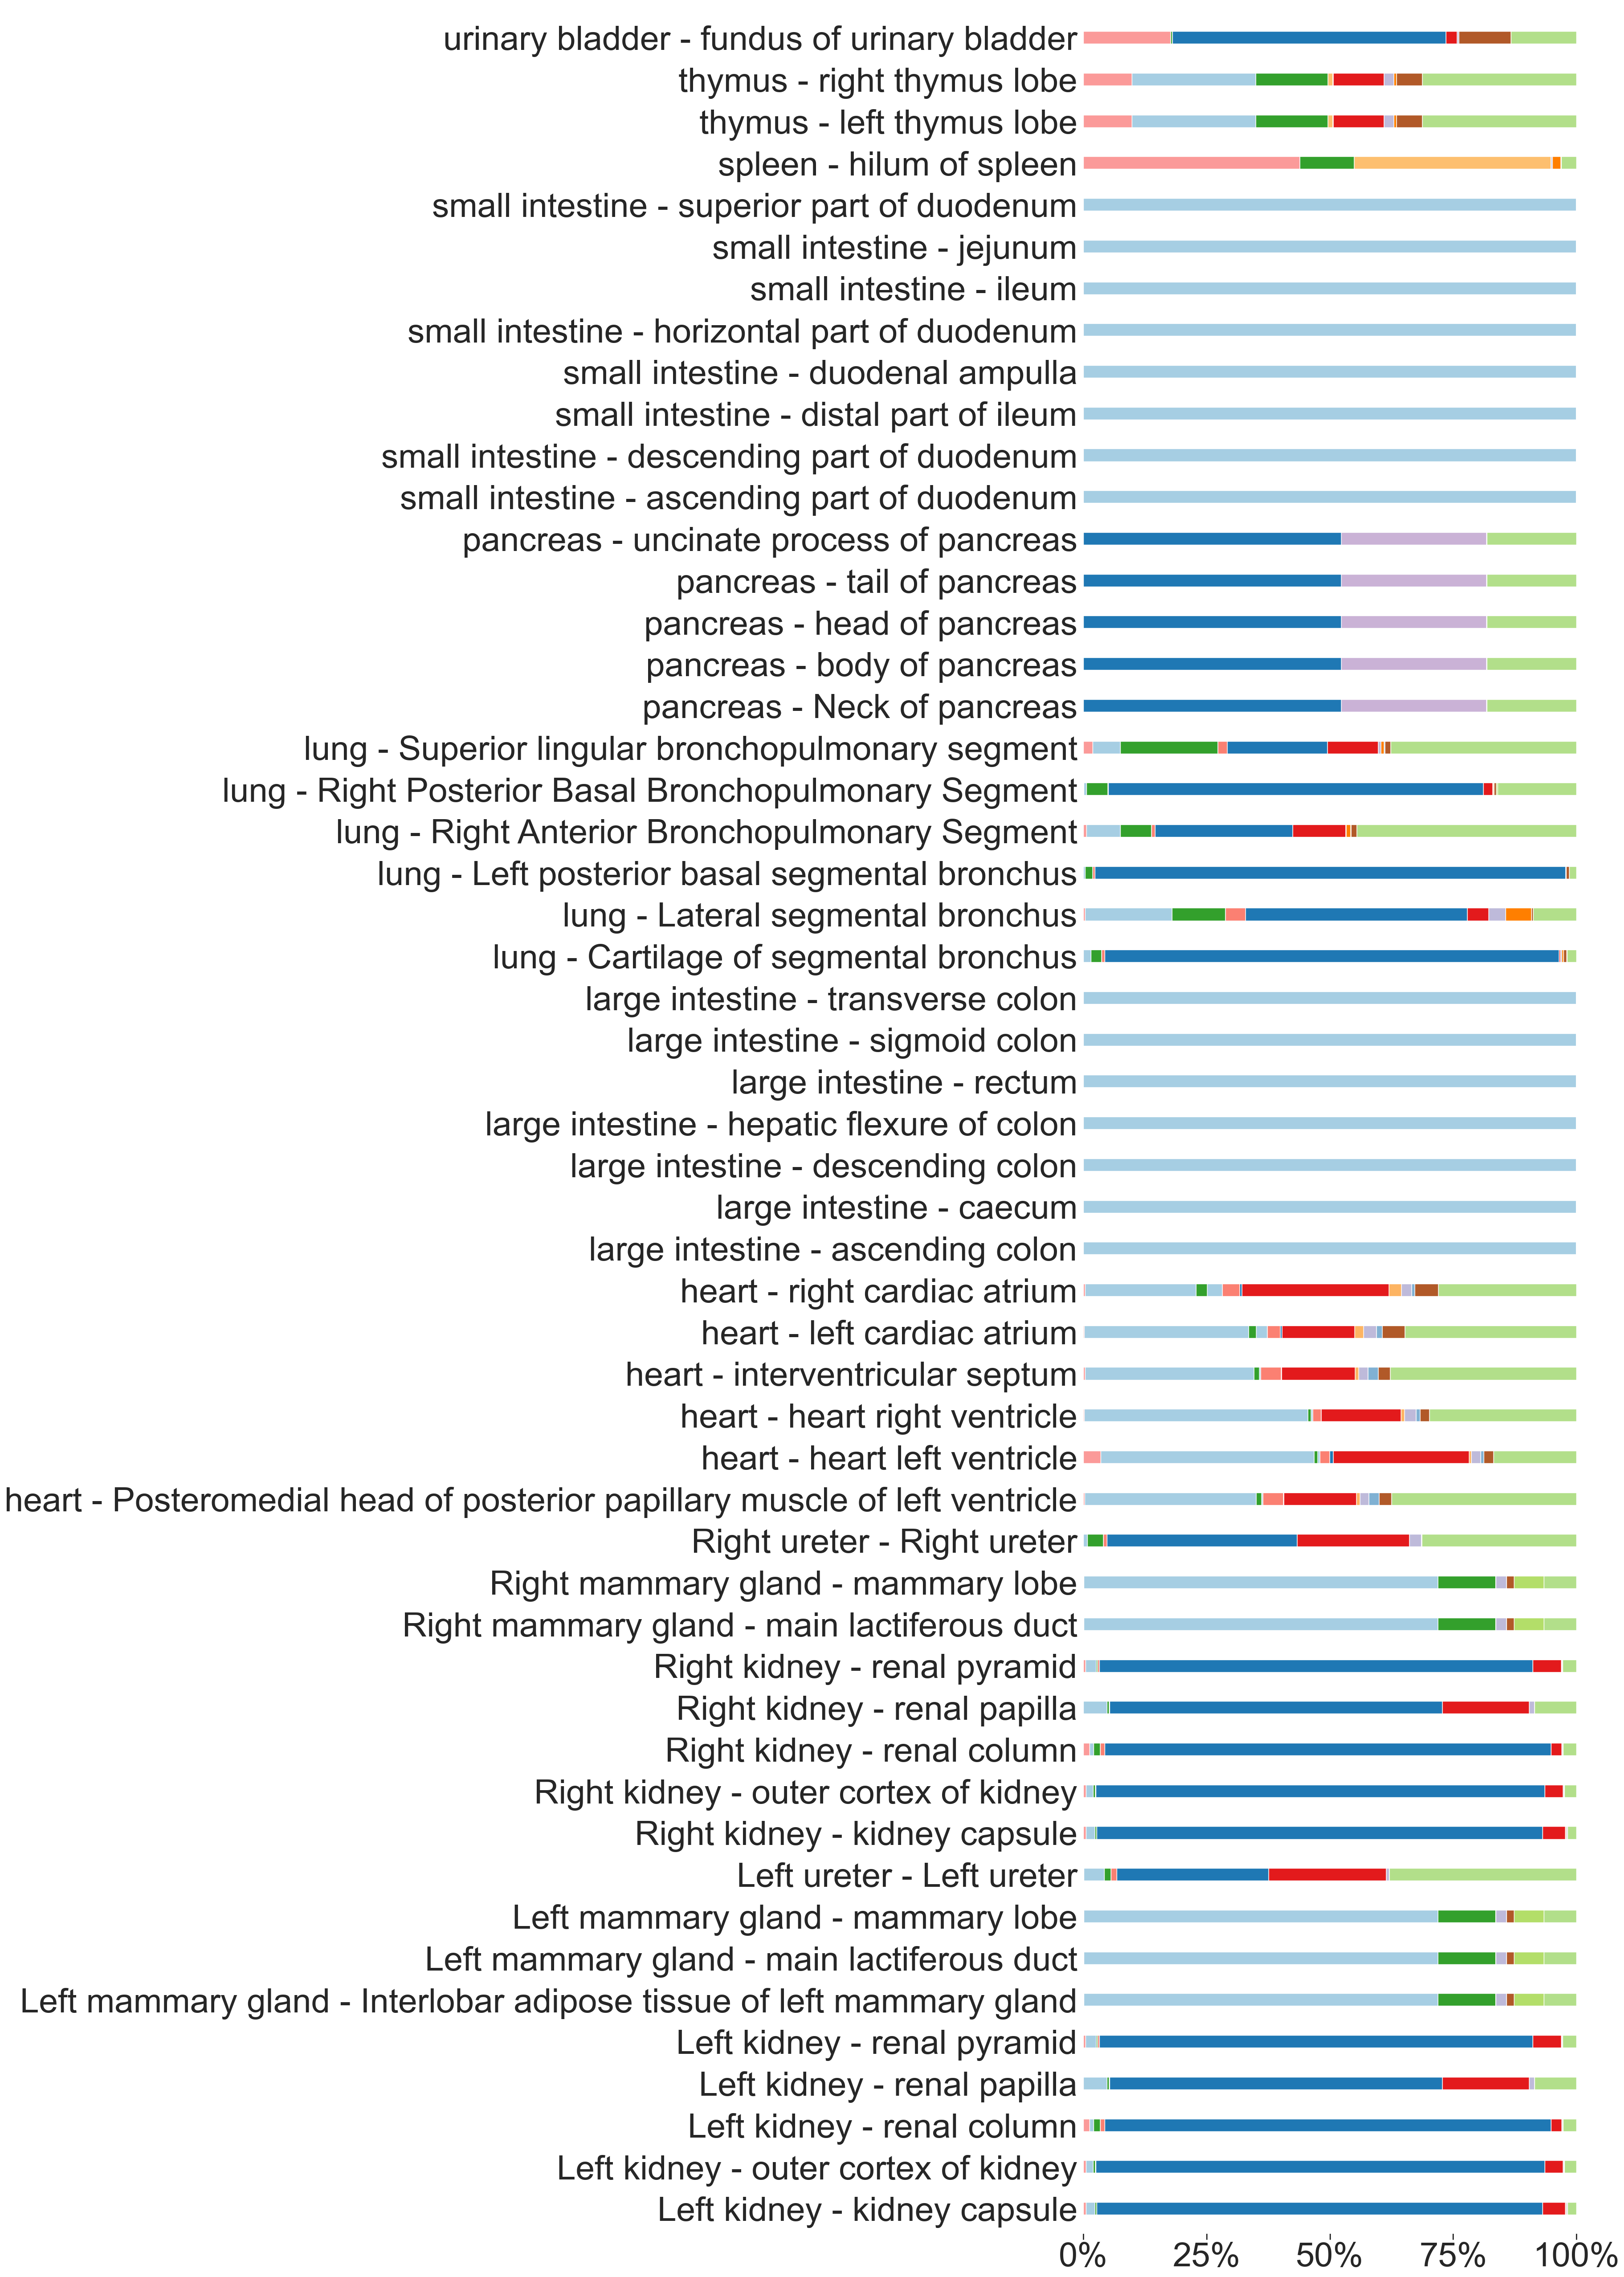

In [122]:
# build visualization
build_stacked_bar_graph('Male', df_filtered, color_map, True)
build_stacked_bar_graph('Female', df_filtered, color_map, False)

## Make look-up for `as_label` to `node_name`

In [118]:
url = 'https://cdn.humanatlas.io/digital-objects/ref-organ/asct-b-3d-models-crosswalk/v1.7/assets/asct-b-3d-models-crosswalk.csv'
df_crosswalk = pd.read_csv(url, skiprows=10)
df_crosswalk

anatomical_structure_of source_spatial_entity                  node_name  \
0                          -       #VHFemaleOrgans  VH_F_integumentary_system   
1               #VHFSkinV1.1       #VHFemaleOrgans                  VH_F_skin   
2                          -                     -         VH_F_mammary_gland   
3       #VHFLeftMammaryGland       #VHFemaleOrgans       VH_F_mammary_gland_L   
4       #VHFLeftMammaryGland       #VHFemaleOrgans                 VH_F_fat_L   
...                      ...                   ...                        ...   
2108           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_1   
2109           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_2   
2110           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_3   
2111           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_4   
2112           #VHMVertebrae         #VHMaleOrgans     VH_M_lumbar_vertebra_5   

                                                label      OntologyID  \
0                          integumentary system layer  UBERON:0013754   
1                                        skin of body  UBERON:0002097   
2                                                   -               -   
3                                  Left mammary gland       FMA:57991   
4     Interlobar adipose tissue of left mammary gland       FMA:73166   
...                                               ...             ...   
2108                                lumbar vertebra 1  UBERON:0004617   
2109                                lumbar vertebra 2  UBERON:0004618   
2110                                lumbar vertebra 3  UBERON:0004619   
2111                                lumbar vertebra 4  UBERON:0004620   
2112                                lumbar vertebra 5  UBERON:0004621   

                                  representation_of       node_type  \
0     http://purl.obolibrary.org/obo/UBERON_0013754  organizational   
1     http://purl.obolibrary.org/obo/UBERON_0002097            mesh   
2                                                 -  organizational   
3              http://purl.org/sig/ont/fma/fma57991  organizational   
4              http://purl.org/sig/ont/fma/fma73166            mesh   
...                                             ...             ...   
2108  http://purl.obolibrary.org/obo/UBERON_0004617            mesh   
2109  http://purl.obolibrary.org/obo/UBERON_0004618            mesh   
2110  http://purl.obolibrary.org/obo/UBERON_0004619            mesh   
2111  http://purl.obolibrary.org/obo/UBERON_0004620            mesh   
2112  http://purl.obolibrary.org/obo/UBERON_0004621            mesh   

     glb file of single organs Ref/1 Ref/1/ID  
0               3d-vh-f-united   NaN      NaN  
1                 3d-vh-f-skin   NaN      NaN  
2                            -   NaN      NaN  
3      3d-vh-f-mammary-gland-l   NaN      NaN  
4      3d-vh-f-mammary-gland-l   NaN      NaN  
...                        ...   ...      ...  
2108            VH_M_Vertebrae   NaN      NaN  
2109            VH_M_Vertebrae   NaN      NaN  
2110            VH_M_Vertebrae   NaN      NaN  
2111            VH_M_Vertebrae   NaN      NaN  
2112            VH_M_Vertebrae   NaN      NaN  

[2113 rows x 10 columns]

In [119]:
# only keep relevant rows
df_filtered

organ                                             as  \
1304      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1306      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1308      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1310      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
1312      Left kidney  http://purl.obolibrary.org/obo/UBERON_0002015   
...               ...                                            ...   
5200  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5201  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5202  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5203  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   
5204  urinary bladder  http://purl.obolibrary.org/obo/UBERON_0001257   

                        as_label     sex     tool            modality  \
1304              kidney capsule  Female  azimuth  sc_transcriptomics   
1306              kidney capsule  Female  azimuth  sc_transcriptomics   
1308              kidney capsule  Female  azimuth  sc_transcriptomics   
1310              kidney capsule  Female  azimuth  sc_transcriptomics   
1312              kidney capsule  Female  azimuth  sc_transcriptomics   
...                          ...     ...      ...                 ...   
5200  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5201  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5202  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5203  trigone of urinary bladder    Male     popv  sc_transcriptomics   
5204  trigone of urinary bladder    Male     popv  sc_transcriptomics   

                                        cell_id  \
1304  http://purl.obolibrary.org/obo/CL_1000718   
1306  http://purl.obolibrary.org/obo/CL_4030016   
1308  http://purl.obolibrary.org/obo/CL_1001108   
1310  http://purl.obolibrary.org/obo/CL_1000768   
1312  http://purl.obolibrary.org/obo/CL_1001107   
...                                         ...   
5200  http://purl.obolibrary.org/obo/CL_0000814   
5201  http://purl.obolibrary.org/obo/CL_0002138   
5202  http://purl.obolibrary.org/obo/CL_0000084   
5203  http://purl.obolibrary.org/obo/CL_0000236   
5204  http://purl.obolibrary.org/obo/CL_0000786   

                                cell_label  cell_count  cell_percentage  \
1304       Inner Medullary Collecting Duct   10748.474         0.216025   
1306       Distal Convoluted Tubule Type 1    6735.132         0.135364   
1308        Medullary Thick Ascending Limb    3580.251         0.071957   
1310                     Connecting Tubule    3390.010         0.068133   
1312                   Ascending Thin Limb    3128.057         0.062868   
...                                    ...         ...              ...   
5200                      mature NK T cell      60.768         0.001877   
5201  endothelial cell of lymphatic vessel      47.393         0.001464   
5202                                T cell      29.786         0.000920   
5203                                B cell      24.758         0.000765   
5204                           plasma cell       3.947         0.000122   

      dataset_count                            level_1_cell_id  \
1304              5  http://purl.obolibrary.org/obo/CL_0000066   
1306              5  http://purl.obolibrary.org/obo/CL_0000066   
1308              5  http://purl.obolibrary.org/obo/CL_0000066   
1310              5  http://purl.obolibrary.org/obo/CL_0000066   
1312              5  http://purl.obolibrary.org/obo/CL_0000066   
...             ...                                        ...   
5200              4  http://purl.obolibrary.org/obo/CL_0000084   
5201              4  http://purl.obolibrary.org/obo/CL_0000000   
5202              4  http://purl.obolibrary.org/obo/CL_0000084   
5203              4  http://purl.obolibrary.org/obo/CL_0000236   
5204              4  http://purl.o

In [120]:
# export relevant columns
subset = df_crosswalk[['label', 'node_name', 'anatomical_structure_of']]
export = subset[subset['label'].isin(df_filtered['as_label'])]
export.to_csv('output/ctBar3dAs/crosswalk.csv', index=False)